## Access to interpolated (0.25 deg) FESOM2 data

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import glob
import intake
import dask
import pandas as pd
dask.config.set({"array.slicing.split_large_chunks": True}) 

Open catalog with EERIE 3 data

In [3]:
cat = intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")

Print what is available for FESOM. This is list of datasets:

In [4]:
print(list(cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.gr025']))

['daily', 'monthly']


We create xarray dataset from [model][experiment][realm][grid][data collection]. In this case we will use `2D_daily_native` collection. Will take some time

In [5]:
# with dask.config.set(array_slicing_split_large_chunks=True):
data = cat['dkrz.disk.model-output.ifs-fesom2-sr.eerie-control-1950.ocean.gr025']['daily'].to_dask()

This is FESOM data on native grid (7M grid points). Those data are located on the corners of triangles (vertices), that we sometimes call nodes, this time cdo decide it knows better and renamed `nod2` dimension to `x`:

In [6]:
data

<xarray.Dataset>
Dimensions:  (time: 730, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01T23:54:00 ... 1951-12-31T23:54:00
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    MLD1     (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    MLD2     (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ssh      (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    sss      (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    uice     (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    vice     (time, lat, lon) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes: (12/21)
    CDI:                                 Climate Data Interface version 2.2.4...
    Conventions:                         CF-1.6
    FESOM_model:                         FESOM2
    FESOM_website:                       fesom.de
    FESOM_git_SHA:                       d6a683a9
    FESOM_MeshPath:                      /scratch/a/a270228/ifs_inputs/fesom/...
    ...                                  ...
    FESOM_evp_rheol_steps:               120
    FESOM_opt_visc:                      7
    FESOM_use_wsplit:                    1
    FESOM_autorotate_back_to_geo:        1
    history:                             Wed Nov 01 14:17:30 2023: cdo -settu...
    CDO:                                 Climate Data Operators version 2.2.2...

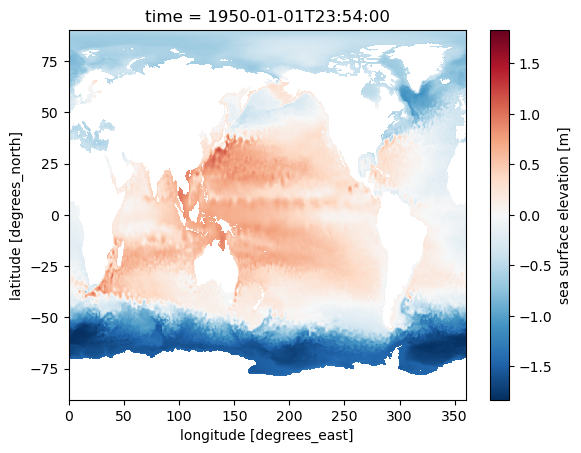

In [7]:
data['ssh'][0,:,:].plot()

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

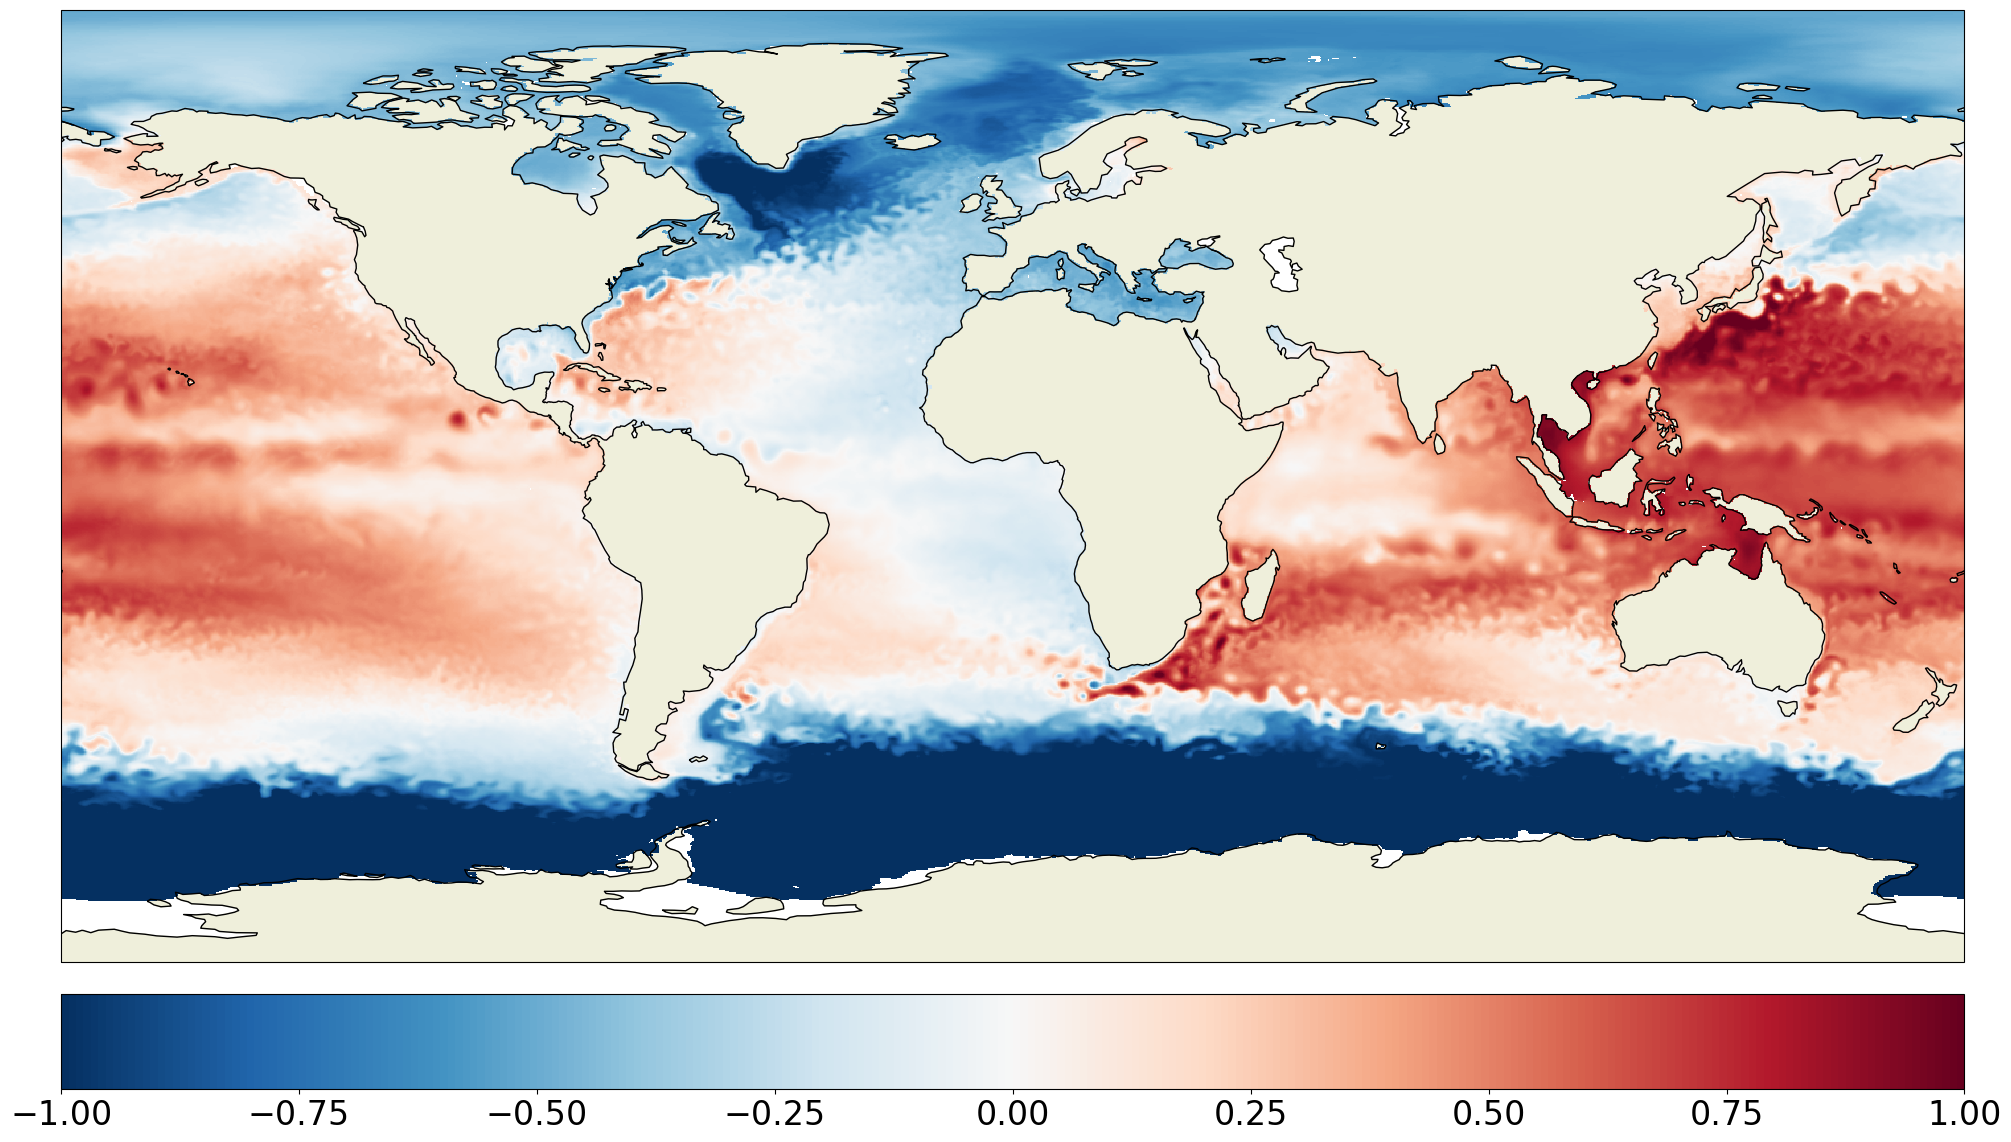

In [11]:
fig, ax = plt.subplots(
                    1,
                    1,
                    subplot_kw=dict(projection=ccrs.PlateCarree()),
                    constrained_layout=True,
                    figsize=(20, 30),
                )
# ax.set_extent(bbox, crs=ccrs.PlateCarree())
im1 = ax.pcolormesh(data.lon.values, data.lat.values, data['ssh'][0,:,:].values,
                    cmap=cm.RdBu_r,
                vmin=-1, vmax=1,
                # extent=(x.min(), x.max(), y.min(), y.max()),
                # interpolation='nearest', 
               transform=ccrs.PlateCarree())
ax.coastlines()
cb = fig.colorbar(im1, orientation='horizontal', pad=0.01)
cb.ax.tick_params(labelsize=24)
ax.add_feature(cfeature.LAND)

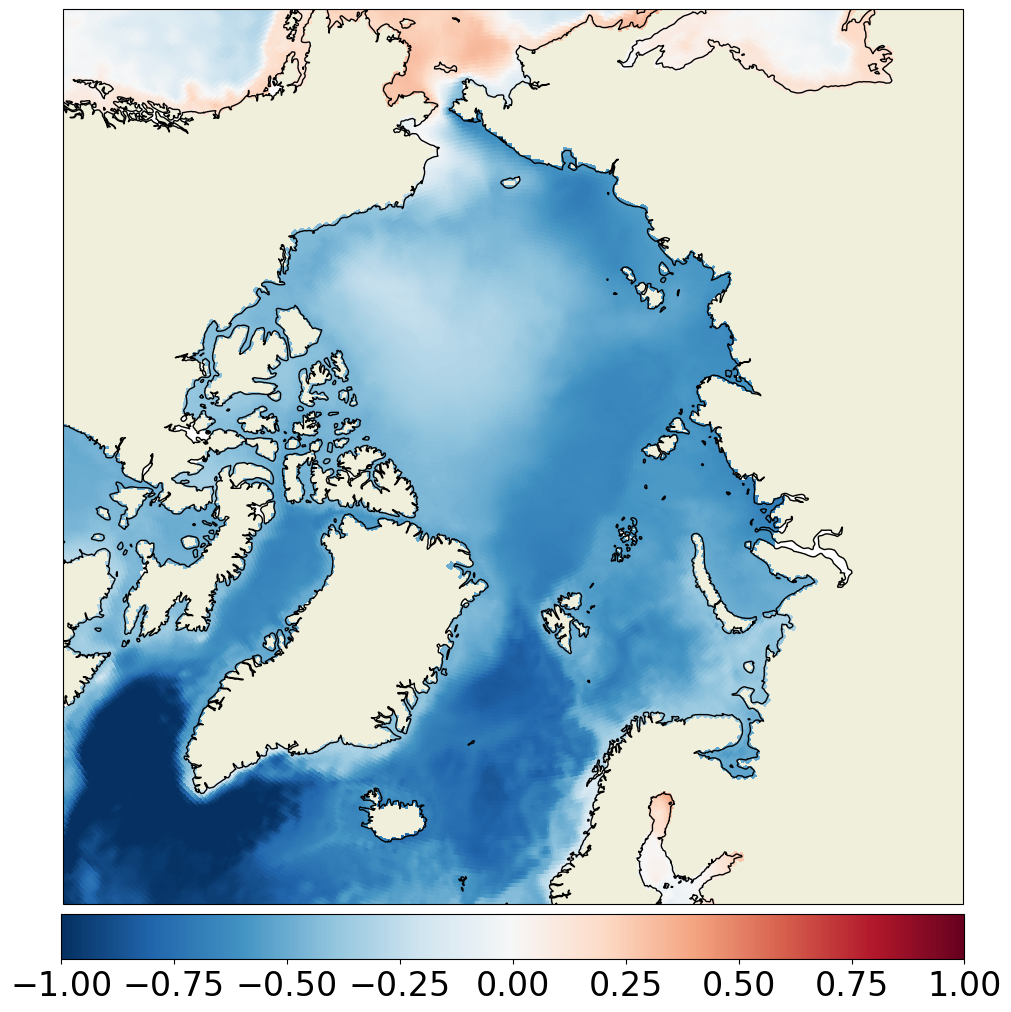

In [19]:
bbox = [-180, 180, 60, 90]
fig, ax = plt.subplots(
                    1,
                    1,
                    subplot_kw=dict(projection=ccrs.NorthPolarStereo()),
                    constrained_layout=True,
                    figsize=(10, 10),
                )
im1 = ax.pcolormesh(data.lon.values, data.lat.values, data['ssh'][0,:,:].values,
                    cmap=cm.RdBu_r,
                vmin=-1, vmax=1,
               transform=ccrs.PlateCarree())
ax.set_extent(bbox, crs=ccrs.PlateCarree())
ax.coastlines()
cb = fig.colorbar(im1, orientation='horizontal', pad=0.01)
cb.ax.tick_params(labelsize=24)
ax.add_feature(cfeature.LAND)